In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Generate toy data set

In [161]:
r = np.tile(np.r_[0:1:100j], 3)

t = np.r_[0:np.pi*4:300j] + np.random.rand(300)

X_train = np.c_[r*np.sin(t), r*np.cos(t)]

y_train = np.arange(3).repeat(100)

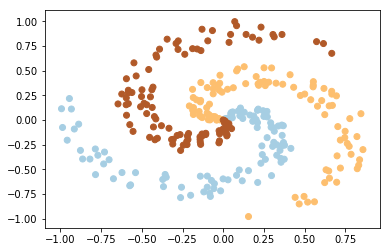

In [162]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Paired)

In [219]:
class NeuralNets(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, X):
        out = self.fc1(X)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        
        return out
    
    def predict(self, X):
        y_score = self(X)
        y_pred = torch.max(y_score,1)[1]
        
        return y_pred
    
    def accuracy(self, y_pred, y):
        return torch.sum(y_pred==y).item()/len(y_pred)
    
    def plot_decision_boundary(self, X_train, y_train):
        x1_min, x2_min = X_train.min(0) - 0.5
        x1_max, x2_max = X_train.max(0) + 0.5
        x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
        y = self.predict(torch.from_numpy(np.c_[x1.ravel(), x2.ravel()]).float())
        plt.pcolormesh(x1, x2, y.reshape(x1.shape), cmap=plt.cm.Paired)
        plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
        plt.show()

In [362]:
model = NeuralNets(2, 128, 3)

In [363]:
loss_fn = nn.CrossEntropyLoss()

In [364]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Loss is 1.1132467985153198 at epoch 0


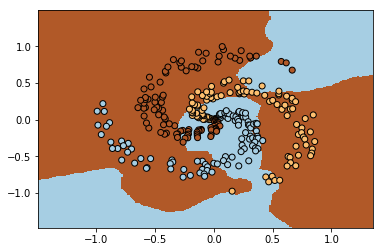

Loss is 0.7321717143058777 at epoch 1000


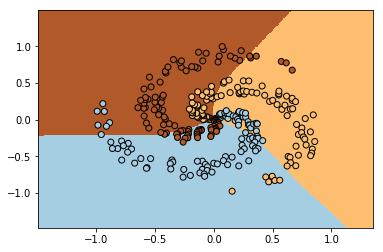

Loss is 0.6112404465675354 at epoch 2000


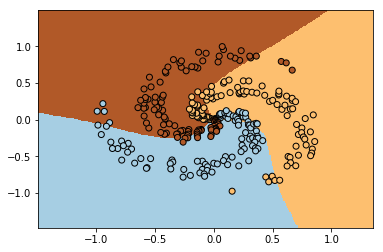

Loss is 0.4692610800266266 at epoch 3000


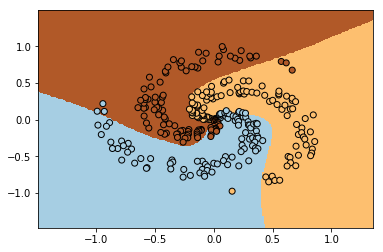

Loss is 0.35665735602378845 at epoch 4000


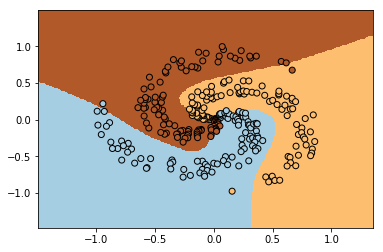

Loss is 0.2805007994174957 at epoch 5000


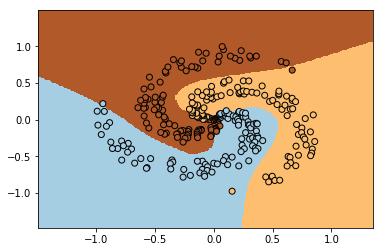

Loss is 0.2248932123184204 at epoch 6000


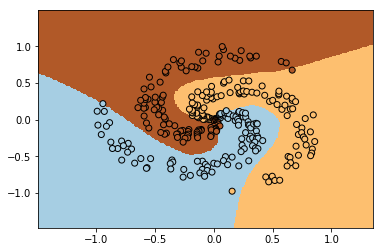

Loss is 0.18222807347774506 at epoch 7000


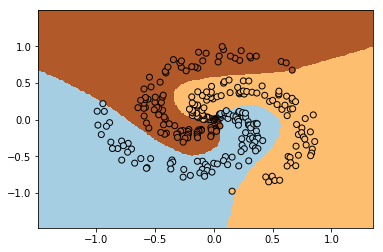

Loss is 0.150431290268898 at epoch 8000


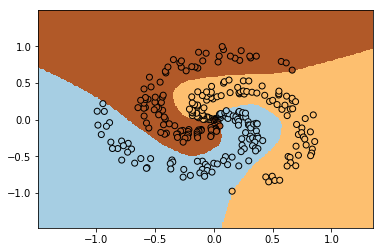

Loss is 0.12667492032051086 at epoch 9000


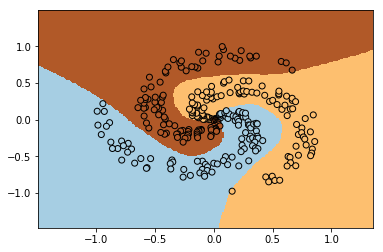

Loss is 0.10892423242330551 at epoch 10000


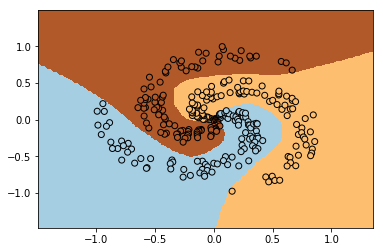

In [365]:
for epoch in range(10001):
    y_score = model(torch.from_numpy(X_train).float())
    loss = loss_fn(y_score, torch.from_numpy(y_train).long())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(f'Loss is {loss} at epoch {epoch}')
        model.plot_decision_boundary(X_train, y_train)

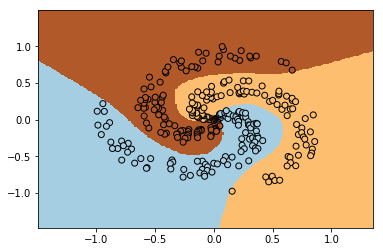

In [346]:
model.plot_decision_boundary(X_train, y_train)

# Plot loss function surface wrt 2 parameters

In [366]:
w1 = (list(model.fc1.parameters())[0])

In [367]:
w1[0,0]

tensor(-0.5470)

In [296]:
w1[0,0]

tensor(0.3905)

In [345]:
w1[0,0] = 1.5

In [408]:
losses = []

In [411]:
steps = np.arange(-100.0,100.0,1)

In [412]:
for i in steps:
    for j in steps:
        w1[0,0] = i
        w1[10,1] = j
        y_score = model(torch.from_numpy(X_train).float())
        loss = loss_fn(y_score, torch.from_numpy(y_train).long())
        losses.append(loss.item())

In [413]:
X, Y = np.meshgrid(steps,steps)

In [414]:
Z = np.array(losses).reshape(X.shape)

In [418]:
#plt.plot(steps, losses)

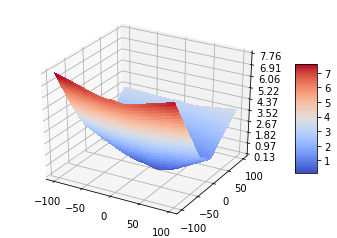

In [417]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
'''
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
'''
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()